<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.975 · Deep Learning · PEC2</p>
<p style="margin: 0; text-align:right;">2021-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC2: Xarxes Neuronals Convolucionals amb KERAS

Al llarg d'aquesta pràctica implementarem diversos models de xarxes neuronals per classificar les imatges de la base de dades [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html).

La base de dades CIFAR10 està formada per imatges en color de dimensions 32x32 píxels que pertanyen a 10 classes:

- airplane (label 0)
- automobile (label 1)
- bird (label 2)
- cat (label 3)
- deer (label 4)
- dog (label 5)
- frog (label 6)
- horse (label 7)
- xip (label 8)
- truck (label 9)

Aquesta base de dades està formada per 60.000 registres que es divideixen en 2 conjunts: 50.000 imatges per al conjunt d'entrenament i 10.000 imatges per al conjunt de test.

A l'exercici durem a terme la tasca de construir diversos models amb l'objectiu d'aconseguir la major precisió en fer la classificació de les imatges. Per això implementarem i analitzarem els models següents:
​
1. Una xarxa neuronal artificial completament connectada
2. Una xarxa neuronal convolucional d'una capa
3. Una xarxa neuronal convolucional profunda

​
En tots els casos es farà servir la llibreria Keras amb Tensorflow per a la implementació del model, la compilació i l'entrenament.

Finalment, farem una predicció de les imatges amb el millor model implementat.

​
**Important: Cadascun dels exercicis pot suposar diversos minuts d'execució, per la qual cosa el lliurament s'ha de fer en format notebook i en format html on es vegi el codi i els resultats i comentaris de cada exercici. Per exportar el notebook a html es pot fer des del menú File $\to$ Download as $\to$ HTML.**

## 1. Descàrrega, anàlisi i preprocessament de les dades (1,5 punts)

### 1.1 Descàrrega de les dades
Comencem important alguns paquets per a la realització de la pràctica i procedim a descarregar el dataset.

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Descarrega el dataset CIFAR10 i fa la partició train/test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 1.2 Anàlisi de les dades
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Representar la dimensió de les variables X_train, y_train, X_test i y_test.

Mostra les imatges dels primers 10 registres del conjunt X_train juntament amb les etiquetes en format text.

**Nota**: Com que les imatges son de mida petita (32x32) es recomana escalar-les a l'hora de representar-les.
</div>

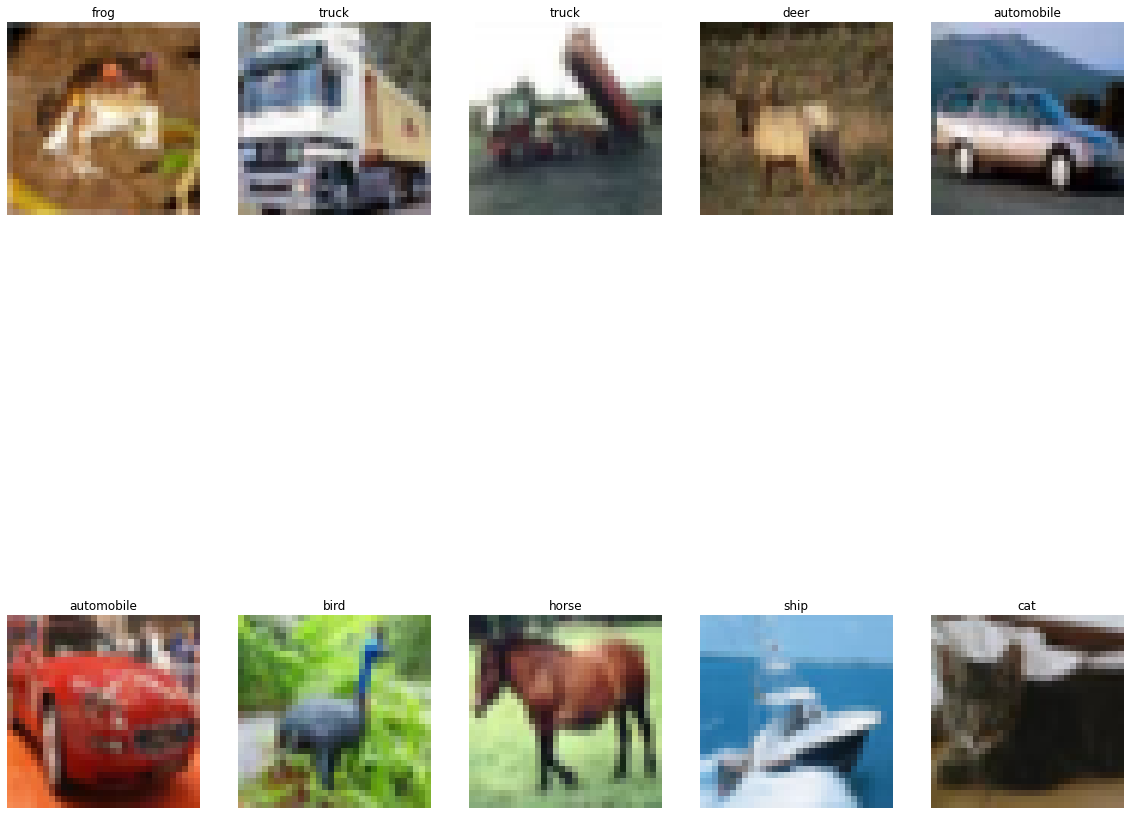

In [3]:
# Anàlisi del conjunt de dades descarregat
# definir textos segons categoria
text_titles = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# definim la graella d'imatges
fig, axes1 = plt.subplots(2,5,figsize=(20,20))
i = 0
for j in range(2):
    for k in range(5):
        axes1[j][k].set_axis_off()
        axes1[j][k].set_title(text_titles[int(y_train[i])])
        axes1[j][k].imshow(X_train[i:i+1][0])
        i += 1

### 1.3 Pre-processament de les dades
Atès que les imatges son en color, les convertirem a escala de grisos per realitzar les primeres classificacions. Per això utilitzarem la funció `cvtColor` del paquet [OpenCV](https://pypi.org/project/opencv-python/) (cv2)

In [4]:
import cv2

# Converteix X_train i X_test a escala de grisos
X_train_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,25 pts.]:</strong> Representar la dimensió de les variables X_train_grey i X_test_grey.

Mostra les imatges dels primers 10 registres del conjunt X_train_grey juntament amb les etiquetes en format text.
</div>

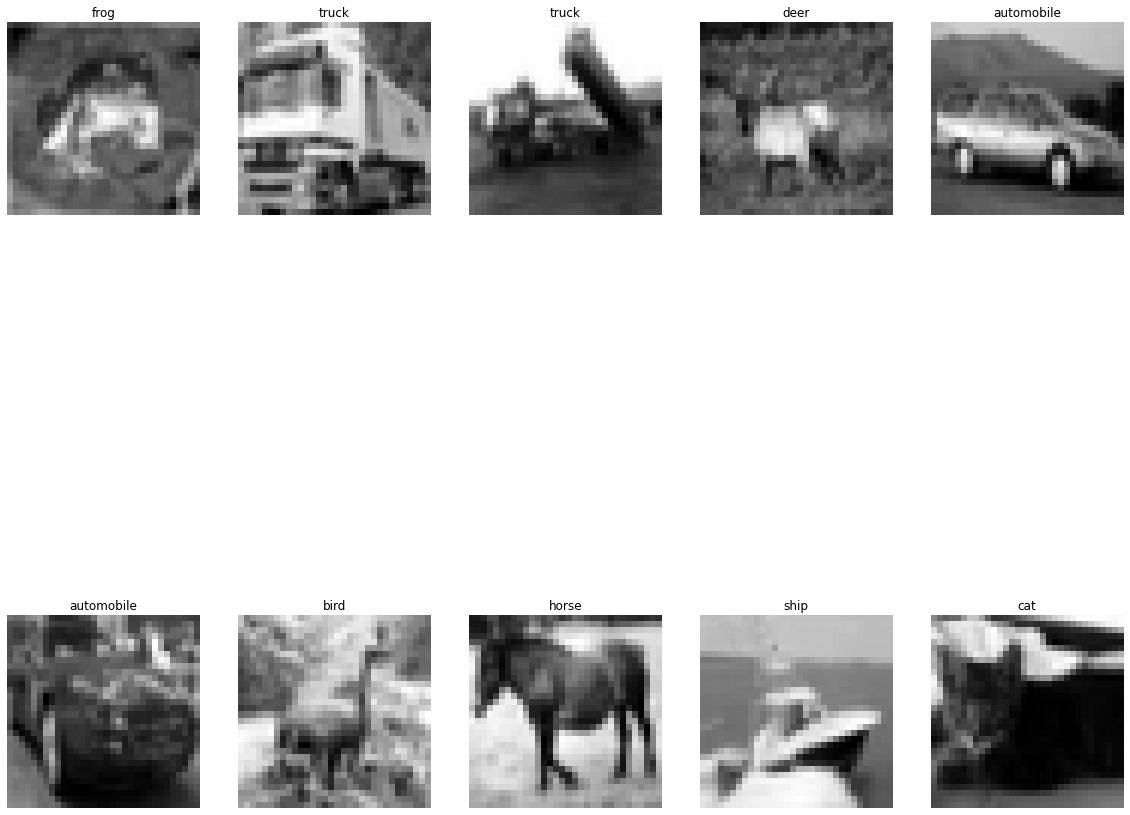

In [5]:
# definim la graella d'imatges
fig, axes1 = plt.subplots(2,5,figsize=(20,20))
i = 0
for j in range(2):
    for k in range(5):
        axes1[j][k].set_axis_off()
        axes1[j][k].set_title(text_titles[int(y_train[i])])
        axes1[j][k].imshow(X_train_grey[i:i+1][0], cmap="gray")
        i += 1

El primer pas per entrenar una xarxa neuronal consisteix a preprocessar les dades d'entrenament i test perquè quadrin amb el format esperat per les entrades i sortides de la xarxa neuronal.

Començarem normalitzant les dades d'entrada perquè estiguin al rang [0,1] ja que, com podem veure a continuació, es tracta de valors sencers entre 0 i 255.

In [6]:
print("Els valors del primer registre de X_train_grey són: {}".format(X_train_grey[0]))

Els valors del primer registre de X_train_grey són: [[ 62  45  47 ... 128 121 120]
 [ 20   0   7 ...  82  77  82]
 [ 23   6  24 ...  78  78  68]
 ...
 [152 123 125 ... 117  27  32]
 [131 104 115 ... 136  58  51]
 [139 123 130 ... 174 112  90]]


In [7]:
# Determinar valors mínim i màxim
v_min = np.min(X_train_grey)
v_max = np.max(X_train_grey)
print("Els valors mínim i màxim són {} y {}.".format(v_min, v_max))

Els valors mínim i màxim són 0 y 255.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Normalitzar les dades d'entrada a la xarxa perquè estiguin compreses al rang [0,1]. Imprimir les dades del primer registre un cop s'ha dut a terme la normalització i tornar a comprovar els valors màxim i mínim. 
</div>

In [8]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X_train_grey = NormalizeData(X_train_grey)
X_test_grey = NormalizeData(X_test_grey)

print("Els valors del primer registre de X_train_grey normalitzats són: {}".format(X_train_grey[0]))
# Determinar valors mínim i màxim
v_min = np.min(X_train_grey)
v_max = np.max(X_train_grey)
print("Els valors mínim i màxim normalitzats són {} y {}.".format(v_min, v_max))

Els valors del primer registre de X_train_grey normalitzats són: [[0.24313725 0.17647059 0.18431373 ... 0.50196078 0.4745098  0.47058824]
 [0.07843137 0.         0.02745098 ... 0.32156863 0.30196078 0.32156863]
 [0.09019608 0.02352941 0.09411765 ... 0.30588235 0.30588235 0.26666667]
 ...
 [0.59607843 0.48235294 0.49019608 ... 0.45882353 0.10588235 0.1254902 ]
 [0.51372549 0.40784314 0.45098039 ... 0.53333333 0.22745098 0.2       ]
 [0.54509804 0.48235294 0.50980392 ... 0.68235294 0.43921569 0.35294118]]
Els valors mínim i màxim normalitzats són 0.0 y 1.0.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,25 pts.]:</strong> Codificar els valors de les etiquetes de sortida en un vector one-hot. Per exemple, el vector de sortida per a una imatge que conté un 5 seria: [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]. Comprovar el resultat imprimint-ne la dimensió i mostrant algun registre.
</div>

**Nota**: Es pot utilitzar la funció `to_categorical` de `tensorflow.keras.utils`. 

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("dimensions un cop fet el one_hot sobre y_train: ",y_train.shape)
print("dimensions un cop fet el one_hot sobre y_test: ",y_test.shape)
print("exemple de registre codificat: ", y_train[10])

dimensions un cop fet el one_hot sobre y_train:  (50000, 10)
dimensions un cop fet el one_hot sobre y_test:  (10000, 10)
exemple de registre codificat:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## 2. Xarxa Neuronal Artificial (ANN) completament connectada [2,5 punts]

A continuació implementarem una xarxa neuronal *feed-forward fully connected* i durem a terme l'entrenament i test sobre el dataset CIFAR.

### 2.1 Pre-processament de les dades

Atès que en una xarxa neuronal artificial les entrades són unidimensionals, la primera cosa que hem de fer és redimensionar les dades d'entrada (les imatges) per convertir-les en arrays d'una dimensió.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Modificar els conjunts X_train_grey i X_test_grey per a que els seus registres siguin arrays unidimensionals de dimensió 32x32 = 1024 dades. Comproveu el resultat imprimint les dimensions de les variables.
</div>

In [10]:
# TODO
X_train_gflat = np.array([value.flatten() for value in X_train_grey])
X_test_gflat = np.array([value.flatten() for value in X_test_grey])

print("Dimensions originals X_train_gray: ",X_train_grey.shape, ", després del flatten: ",X_train_gflat.shape, " i cada imatge: ", len(X_train_gflat[0]))
print("Dimensions originals X_train_gray: ",X_test_grey.shape, ", després del flatten: ",X_test_gflat.shape, " i cada imatge: ", len(X_train_gflat[0]),"\n")
print("Exemple de valor: ",X_train_gflat[10], " i dimensió: ",X_train_gflat[10].shape)
print("comprovem valor del pixel 1,10 de la primera imatge original:", X_train_grey[0][1][10], " amb el valor 42 -corresponent a 32 + 10 - actual: ", X_train_gflat[0][42])

Dimensions originals X_train_gray:  (50000, 32, 32) , després del flatten:  (50000, 1024)  i cada imatge:  1024
Dimensions originals X_train_gray:  (10000, 32, 32) , després del flatten:  (10000, 1024)  i cada imatge:  1024 

Exemple de valor:  [0.23529412 0.23137255 0.22352941 ... 0.22352941 0.23529412 0.18431373]  i dimensió:  (1024,)
comprovem valor del pixel 1,10 de la primera imatge original: 0.25098039215686274  amb el valor 42 -corresponent a 32 + 10 - actual:  0.25098039215686274


### 2.2 Creació del model


Farem servir el model `Sequential` de Keras

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [2 pts.]:</strong> Implementa el següent model de xarxa neuronal artificial:
<ul>
<li> Dissenya l'arquitectura per al model de classificació amb les característiques següents:</li>
   <ul>
   <li> 6 capes ocultes de 128 neurones.</li>
   <li> 3 capes de Dropout del 20% (rate=0,2) intercalades cada 2 capes denses.
   <li> Funció d'activació de les capes intermèdies: ReLU.</li>
   <li> 1 capa de sortida amb les dimensions i la funció d'activació adequades per realitzar la classificació.
   </ul>

<li> Imprimeix el model per veure el nombre de paràmetres que cal entrenar.

<li> Compila el model amb la funció de pèrdua més adequada, l'optimitzador SGD, una velocitat d'aprenentatge de 0.01 i la mètrica Accuracy.</li>

<li> Ajusta el model amb 100 èpoques i una mida del batch de 128. Mesura el temps d'entrenament.</li>

<li> Mostra les gràfiques d'accuracy i loss. A cada gràfica cal visualitzar la corba d'entrenament i la de validació. NOTA: Es recomana fer una funció que imprimeixi les dues gràfiques per poder-la reutilitzar en propers apartats.</li>
<li> Realitza l'avaluació del model per mostrar la pèrdua i la precisió final. </li>
</ul>
</div>

In [11]:
# Crear el model ANN
ANN = keras.Sequential()
ANN.add(Dense(128, activation="relu", input_shape=(1024,)))
ANN.add(Dense(128, activation="relu"))
ANN.add(Dropout(0.2))
ANN.add(Dense(128, activation="relu"))
ANN.add(Dense(128, activation="relu"))
ANN.add(Dropout(0.2))
ANN.add(Dense(128, activation="relu"))
ANN.add(Dense(128, activation="relu"))
ANN.add(Dropout(0.2))
ANN.add(Dense(10, activation="softmax"))

ANN.summary()

2022-04-09 20:37:30.050207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 20:37:30.059387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 20:37:30.060123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 20:37:30.061082: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1

In [12]:
# Compile
ANN.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [13]:
# Entrenar el model
start=time.time()
ANN_fitted = ANN.fit(X_train_gflat, y_train, epochs=100, batch_size=128, validation_data=(X_test_gflat, y_test), verbose = 0)
end=time.time()
print("Temps d'entrenament ANN: ","{:.2f}".format(end-start),"s")

2022-04-09 20:37:31.746662: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Temps d'entrenament ANN:  142.80 s


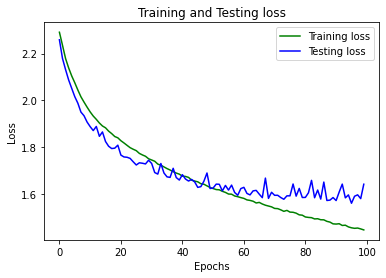

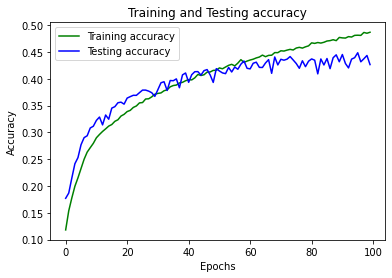

In [14]:
# Plot del training loss i l'accuracy
def plot_prediction(n_epochs, mfit):
  loss_train = mfit.history['loss']
  loss_val = mfit.history['val_loss']
  epochs = range(0,n_epochs)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='Testing loss')
  plt.title('Training and Testing loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  acc_train = mfit.history['accuracy']
  acc_val = mfit.history['val_accuracy']
  plt.plot(epochs, acc_train, 'g', label='Training accuracy')
  plt.plot(epochs, acc_val, 'b', label='Testing accuracy')
  plt.title('Training and Testing accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

plot_prediction(100,ANN_fitted)

In [15]:
# Resultats
print("Evaluate on test data")
results = ANN.evaluate(X_test_gflat, y_test, batch_size=128)
print("ANN test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 1.6416 - accuracy: 0.4265
ANN test loss, test acc: [1.6415785551071167, 0.42649999260902405]


## 3. Xarxa Neuronal Convolucional d'una capa [2.5 punts]

A continuació implementarem una xarxa neuronal convolucional d'una capa i farem l'entrenament i el test sobre el dataset CIFAR.

Es recomana, a partir d'aquest punt, fer l'entrenament en una màquina amb GPU (es pot activar en plataformes com Google Colab o Kaggle) per tal de reduir els temps d'entrenament.

### 3.1 Pre-processament de les dades

El primer pas per entrenar una xarxa neuronal consisteix a preprocessar les dades d'entrenament i test perquè quadrin amb les dimensions de l'entrada de la xarxa neuronal.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Ajusteu la mida de les dades d'entrenament i test perquè tinguin 4 dimensions (l'última dimensió ha de ser 1 per indicar que les imatges estan en escala de grisos).
</div>

**Nota**: Utilitzar el nombre de dades d'entrenament i test i la mida de les imatges.

In [16]:
X_train_CNN = X_train_grey.reshape(50000,32,32,1)
X_test_CNN = X_test_grey.reshape(10000,32,32,1)

### 3.2 Creació del model


Es vol implementar el model `Sequential` de Keras amb les següents característiques:

- La primera capa que afegirem serà una capa convolucional amb les propietats següents:
     - Nombre de kernels (neurones) de la primera capa oculta: 64 neurones
     - Grandària dels kernels: 3x3
     - Activació dels kernels: ReLU
- A continuació, afegirem una capa Flatten per connectar la sortida de la capa convolucional amb l'entrada d'una capa densa.
- Finalment, afegirem una capa densa de sortida amb el nombre de neurones i funció d'activació adequades per dur a terme la classificació.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [1,5 pts.]:</strong> Construir el model segons els requeriments indicats.

A més:
<ul>
<li> Imprimeix el model per veure el nombre de paràmetres que cal entrenar.

<li> Compila el model amb la funció de pèrdua més adequada, l'optimitzador ADAM i la mètrica Accuracy.</li>

<li> Ajusta el model amb 20 èpoques i una mida del batch de 128. Mesura el temps d'entrenament.</li>

<li> Mostra les gràfiques d'accuracy i loss. A cada gràfica cal visualitzar la corba d'entrenament i la de validació</li>
<li> Realitza l'avaluació del model per mostrar la pèrdua i la precisió final. </li>
</div>
</ul>

In [17]:
# Crear la CNN monocapa
CNN = Sequential()

# Añadir las capas indicadas
CNN.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(32,32,1)))
CNN.add(Flatten())
CNN.add(Dense(10, activation="softmax"))

CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                576010    
Total params: 576,650
Trainable params: 576,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Entrenament del model
start = time.time()
CNNfit = CNN.fit(X_train_CNN, y_train, validation_data=(X_test_CNN, y_test), batch_size=128, epochs=20, verbose = 0)
end=time.time()
print("Temps d'entrenament CNN: ","{:.2f}".format(end-start),"s")

2022-04-09 20:39:55.843571: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Temps d'entrenament CNN:  41.69 s


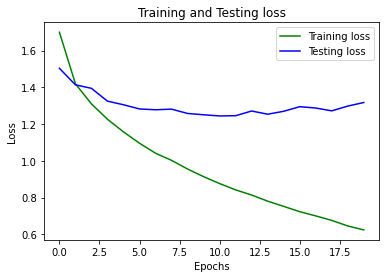

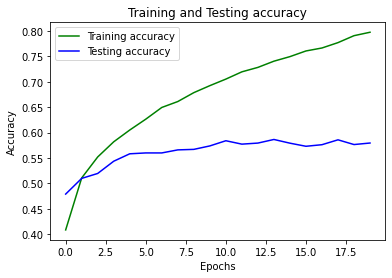

Evaluate on test data
79/79 [==============================] - 0s 4ms/step - loss: 1.3175 - accuracy: 0.5794
CNN test loss, test acc: [1.3174737691879272, 0.5794000029563904]


In [20]:
# Resultats
plot_prediction(20,CNNfit)
print("Evaluate on test data")
results = CNN.evaluate(X_test_CNN, y_test, batch_size=128)
print("CNN test loss, test acc:", results)

### 3.3 GPU vs CPU


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Tornar a entrenar el model des de zero en un entorn sense GPU (només amb la CPU) i compara els temps d'entrenament. Comenta els resultats.
</div>

Tornant a entrenar el mateix model només amb la CPU observem que el temps d'entrenament augmenta de 28.8 segons a més de 10 minuts. A causa de la seva capacitat de processament paral·lel, una GPU és molt més ràpida que una CPU. Per a maquinari amb el mateix any de producció, el rendiment màxim de la GPU pot ser deu vegades superior amb un ample de banda del sistema de memòria significativament més gran que una CPU. A més, les GPU proporcionen una potència de processament superior i ample de banda de memòria. Són fins a 100 vegades més ràpides que les CPU amb programari no optimitzat.

## 4. Deep CNN amb Maxpooling i Dropout [2 punts]

A l'exercici anterior hem implementat una xarxa convolucional d'una sola capa. Ara implementarem una xarxa neuronal convolucional profunda i veurem com això es tradueix en un millor rendiment en els resultats.

### 4.1 Creació del model


En aquest cas tornarem a utilitzar el model `Sequential` de Keras que constarà de:
- Dues capes convolucionals de 32 kernels cadascuna de mida 3x3
- Una capa de MaxPooling amb una mida de 2x2
- Una capa de Dropout amb un rate=0.2
- Dues capes convolucionals de 64 kernels cadascuna de mida 3x3
- Una capa de MaxPooling amb una mida de 2x2
- Una capa de Dropout amb un rate=0.2
- Dues capes convolucionals de 128 kernels cadascuna de mida 3x3
- Una capa de MaxPooling amb una mida de 2x2
- Una capa de Dropout amb un rate=0.2
- Totes les capes convolucionals amb funció d'activació ReLU i padding = same
- Una capa Flatten
- Una capa densa amb 128 neurones i funció d'activació ReLU
- Una capa de Dropout amb un rate=0.2
- Una capa densa de sortida amb el nombre de neurones i la funció d'activació necessàries per dur a terme la classificació

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [1,5 pts.]:</strong> Construir el model segons els requeriments indicats, a més:
<ul>
<li> Imprimeix el model per veure el nombre de paràmetres que cal entrenar.

<li> Compila el model amb la funció de pèrdua més adequada, l'optimitzador SGD (amb learning rate de 0.001 i momentum de 0.9) i la mètrica Accuracy.</li>

<li> Ajusta el model amb 150 èpoques i una mida del batch de 128. Mesura el temps d'entrenament.</li>

<li> Mostra les gràfiques d'accuracy i loss. A cada gràfica cal visualitzar la corba d'entrenament i la de validació</li>
<li> Realitza l'avaluació del model per mostrar la pèrdua i la precisió final. </li>
</div>
</ul>
</div>

In [21]:
# Crear la CNN profunda

DeepCNN = keras.Sequential()

DeepCNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
DeepCNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNN.add(MaxPooling2D(2, 2))
DeepCNN.add(Dropout(0.2))
DeepCNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNN.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNN.add(MaxPooling2D(2, 2))
DeepCNN.add(Dropout(0.2))
DeepCNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNN.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNN.add(MaxPooling2D(2, 2))
DeepCNN.add(Dropout(0.2))
DeepCNN.add(Flatten())
DeepCNN.add(Dense(128, activation="relu"))
DeepCNN.add(Dropout(0.2))
DeepCNN.add(Dense(10, activation="softmax"))

DeepCNN.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)         

In [22]:
# Compile
opt = SGD(learning_rate=0.001, momentum=0.9)
DeepCNN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	

In [23]:
# Entrenament del model
start = time.time()
DeepCNNfit = DeepCNN.fit(X_train_CNN, y_train, validation_data=(X_test_CNN, y_test), batch_size=128, epochs=150, verbose = 0)
end=time.time()
print("Temps d'entrenament DeepCNN: ","{:.2f}".format((end-start)/60),"min")

Temps d'entrenament DeepCNN:  7.28 min


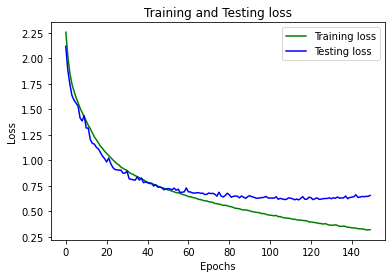

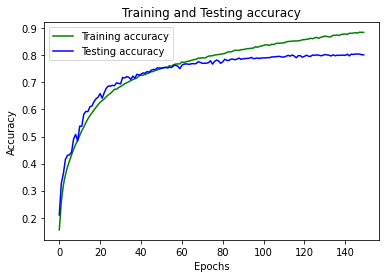

Evaluate on test data
79/79 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.8020
DeepCNN test loss, test acc: [0.6549292802810669, 0.8019999861717224]


In [24]:
# Resultats
plot_prediction(150,DeepCNNfit)
print("Evaluate on test data")
results = DeepCNN.evaluate(X_test_CNN, y_test, batch_size=128)
print("DeepCNN test loss, test acc:", results)

### 4.2 CNN amb imatges en color


Finalment estudiarem la influència del color de les imatges en la *performance* de la classificació.

Per això utilitzarem una xarxa convolucional amb la mateixa estructura de la xarxa de l'apartat anterior però canviant la capa d'entrada perquè puguem introduir les imatges originals en color, arrays de dimensió (32, 32, 3).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts]:</strong> Tornar a fer l'exercici anterior però modificant la capa d'entrada per poder utilitzar el conjunt de dades original, de mida (50000, 32, 32, 3) per al conjunt de train i (10000, 32, 32, 3) per al conjunt de test.

Influeix el color de les imatges en el resultat de la classificació? Comenteu el resultat.
</div>

**Nota**: Recordeu normalitzar les imatges per a que els seus valors estiguin entre 0 i 1.

In [25]:
# Normalitzar
X_train_norm = NormalizeData(X_train)
X_test_norm = NormalizeData(X_test)


In [26]:
# Crear la CNN profunda
DeepCNNRGB = keras.Sequential()

DeepCNNRGB.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
DeepCNNRGB.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNNRGB.add(MaxPooling2D(2, 2))
DeepCNNRGB.add(Dropout(0.2))
DeepCNNRGB.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNNRGB.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNNRGB.add(MaxPooling2D(2, 2))
DeepCNNRGB.add(Dropout(0.2))
DeepCNNRGB.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNNRGB.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
DeepCNNRGB.add(MaxPooling2D(2, 2))
DeepCNNRGB.add(Dropout(0.2))
DeepCNNRGB.add(Flatten())
DeepCNNRGB.add(Dense(128, activation="relu"))
DeepCNNRGB.add(Dropout(0.2))
DeepCNNRGB.add(Dense(10, activation="softmax"))

DeepCNNRGB.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [27]:
# Compile
DeepCNNRGB.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Entrenament del model
start = time.time()
DeepCNNRGBfit = DeepCNNRGB.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), batch_size=128, epochs=150, verbose = 0)
end=time.time()
print("Temps d'entrenament DeepCNNRGB: ","{:.2f}".format((end-start)/60),"min")

Temps d'entrenament DeepCNNRGB:  7.30 min


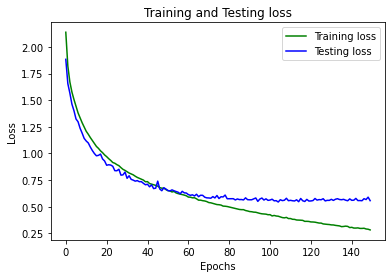

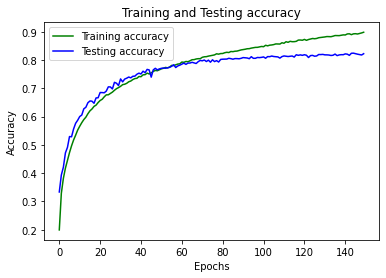

Evaluate on test data
79/79 [==============================] - 0s 4ms/step - loss: 0.5564 - accuracy: 0.8226
DeepCNN test loss, test acc: [0.5563539862632751, 0.8226000070571899]


In [29]:
# Resultats
# Resultats
plot_prediction(150,DeepCNNRGBfit)
print("Evaluate on test data")
results = DeepCNNRGB.evaluate(X_test_norm, y_test, batch_size=128)
print("DeepCNN test loss, test acc:", results)

## 5. Comparativa dels models implementats i predicció [1,5 punts]

En aquest darrer apartat compararem els models implementats i farem la classificació d'algunes imatges amb el model que ha donat els millors resultats.

### 5.1 Comparativa dels models implementats

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Realitzar una comparativa dels models implementats comentant:

* La precisió obtinguda
* La pèrdua
* El temps d'entrenament
* El nombre de paràmetres a entrenar

Comenteu els resultats obtinguts.

En base als resultats obtinguts, quin model seleccionaríeu com el millor?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Solució:</strong> 
</div>

Hem començat la pràctica entrenant un model de xarxa neuronal artificial completament connectada (ANN), posteriorment una xarxa neuronal convolucional d'una capa (CNN) i posteriorment una xarxa profunda amb Maxpooling i Dropout, tant per imatges en blanc i negre (DeepCNN) com amb imatges en color (DeepCNNRGB). Comencem a analitzar-ne les diferències:

**Precisió**
La precisió obtinguda amb la ANN ha estat solsament del 0.437. La precisió obtinguda amb la CNN ha agmentat a 0.578. La precisió obtinguda per la DeepCNN i la DeepCNNRGB ha estat de 0,813 i 0,827 respectivament. Com es pot comprovar, les millors precisions han estat amb les xarxes profundes, tant en blanc i negre com en color (hi ha mot poca diferència entre elles, per tant realment és pràcticament indiferent utilitzar les imatges en color o en blanc i negre). El que sí que observem és el model d'una xarxa neuronal completament connectada és incapaç d'obtenir una precisió satisfactòria. I que les xarxes profundes necessiten de capes de Dropout i de Maxpooling per millorar el seu entrenament (passem de 0,578, una precisió molt pobre, a 0,813, una precisió ja molt acceptable).

**Pèrdua**
Recordem que la pèrdua és un valor escalar que intentem minimitzar durant l'entrenament del model. Com menor sigui la pèrdua, més properes estan les nostres prediccions a les etiquetes reals. Si observem les pèrdues pels diferent models provats veiem que per la ANN la pèrdua ha estat del 1,57. Per a la CNN hem obtingut una pèrdua de 1.29. Mentre pels models de xarxes profundes amb Maxpooling i Dropout hem obtingut una pèrdua del 0,62 per a les imatges en blanc i negre i 0,57 per a les imatges en color. Per tant observem que les prediccions pels models de xarxes profundes amb Maxpooling i Dropout seran molt millors que amb els altres models, ja que el valors de pèrdua és el més aproximat a zero.

**Temps d'entrenament**
Els temps d'entrenament varien en funció de la complexitat dels models. Processant tots els entrenaments amb GPU per poder comparar millor veiem que per a la xarxa neuronal artificial completament connectada ANN, tenim un temps d'entrenament de 142,8 segons. Per a la xarxa convolucional CNN tenim un temps d'entrenament de 28,8 s. Per a les xarxes profundes DeepCNN i DeepCNNRGB tenim uns temps pràcticament idèntics de 7,24 minuts i 7,22 minuts. Veiem que la xarxa convolucional d'una capa és la més ràpida, amb només 28,8s, encara que aquesta xarxa entrenada nomes amb CPU (sense GPU) tarda uns 10 minuts. També veiem que entrenar la xarxa amb les dades en blanc i negre o en color no té diferències. Això és degut a que els canals del RGB van en paral·lel i, per tant, els temps d'entrenar un dels canals és molt similar a entrenar el canal únic d'imatges en blanc i negre. I com que van en paral·lel els temps no sumen i són pràcticament idèntics.

**Nombre de paràmetres a entrenar**
Podem observar la diferència de paràmetres a entrenar. Per a l'ANN hem d'entrenar 215.050 paràmetres. Per a la CNN hem d'entrenar 576.650 paràmetres. Per a la DeepCNN 549.994 (en blanc i negre) i 550.570 (en colors). Observem que tot la xarxa neuronal artificial completament connectada té la pitjor relació temps d0entrenament vs. paràmetres, ja que tot i tenir el menor nombre de paràmetres té un temps d'entrenament bastant elevat (142,8 segons).

D'aquest resultats podem deduir el següent:

- en xarxes neuronals profundes sembla que l'entrenament per dades de les mateixes dimensions, és pràcticament independent de les capes. Això ho deduim de comparar les xarxes profundes neuronals amb les imatges en blanc i negre (1 capa) respecte a les imatges en color (3 capes) on veiem que els temps i la precisió són molt semblant, per bé que fins i tot els resultats amb les imatges en color són millors. Crec que segurament és degut justament al color, ja que un to de gris pot correspondre a molts colors diferents, colors que poden ajudar a categoritzar una imatge.

- veiem que les xarxes neuronals artificials completament connectades no són òptimes per a la classificació d'imatges (tenen molt poca precisió i massa pèrdua) i, a més, un temps de processament massa elevat per la seva "senzillesa".

- observem també la necessitat d'incloure capes de Maxpooling i capes de Dropout en les xarxes neuronals profundes, ja que tot i augmentar bastant el temps d'entrenament, el model millora moltíssim en precisió i en pèrdua.

Veient els resultats, el millor model crec que és el de la xara neuronal profunda amb Maxpooling i Dropout i amb les imatges en color, ja que donen un plus addicional de precisió i pèrdua respecte a les imatges en blanc i negre, sense penalitzar en temps d'entrenament ni paràmetres a entrenar.

### 5.2 Anàlisi de la millor solució

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Realitzar una anàlisi de les mesures estadístiques més rellevants del model seleccionat a l'apartat anterior i representeu la matriu de confusió.

Quina classe és la que millor es prediu? I la que pitjor resultats obté?

Comentar els resultats
</div>

In [30]:
# Informe
y_pred = DeepCNNRGB.predict(X_test_norm)

# convert prediction to categorical
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)

# print report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.88      0.93      0.91      1000
           2       0.77      0.74      0.75      1000
           3       0.67      0.65      0.66      1000
           4       0.80      0.81      0.80      1000
           5       0.76      0.74      0.75      1000
           6       0.83      0.89      0.86      1000
           7       0.88      0.84      0.86      1000
           8       0.90      0.90      0.90      1000
           9       0.90      0.87      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'sheep'),
 Text(0, 9.5, 'truck')]

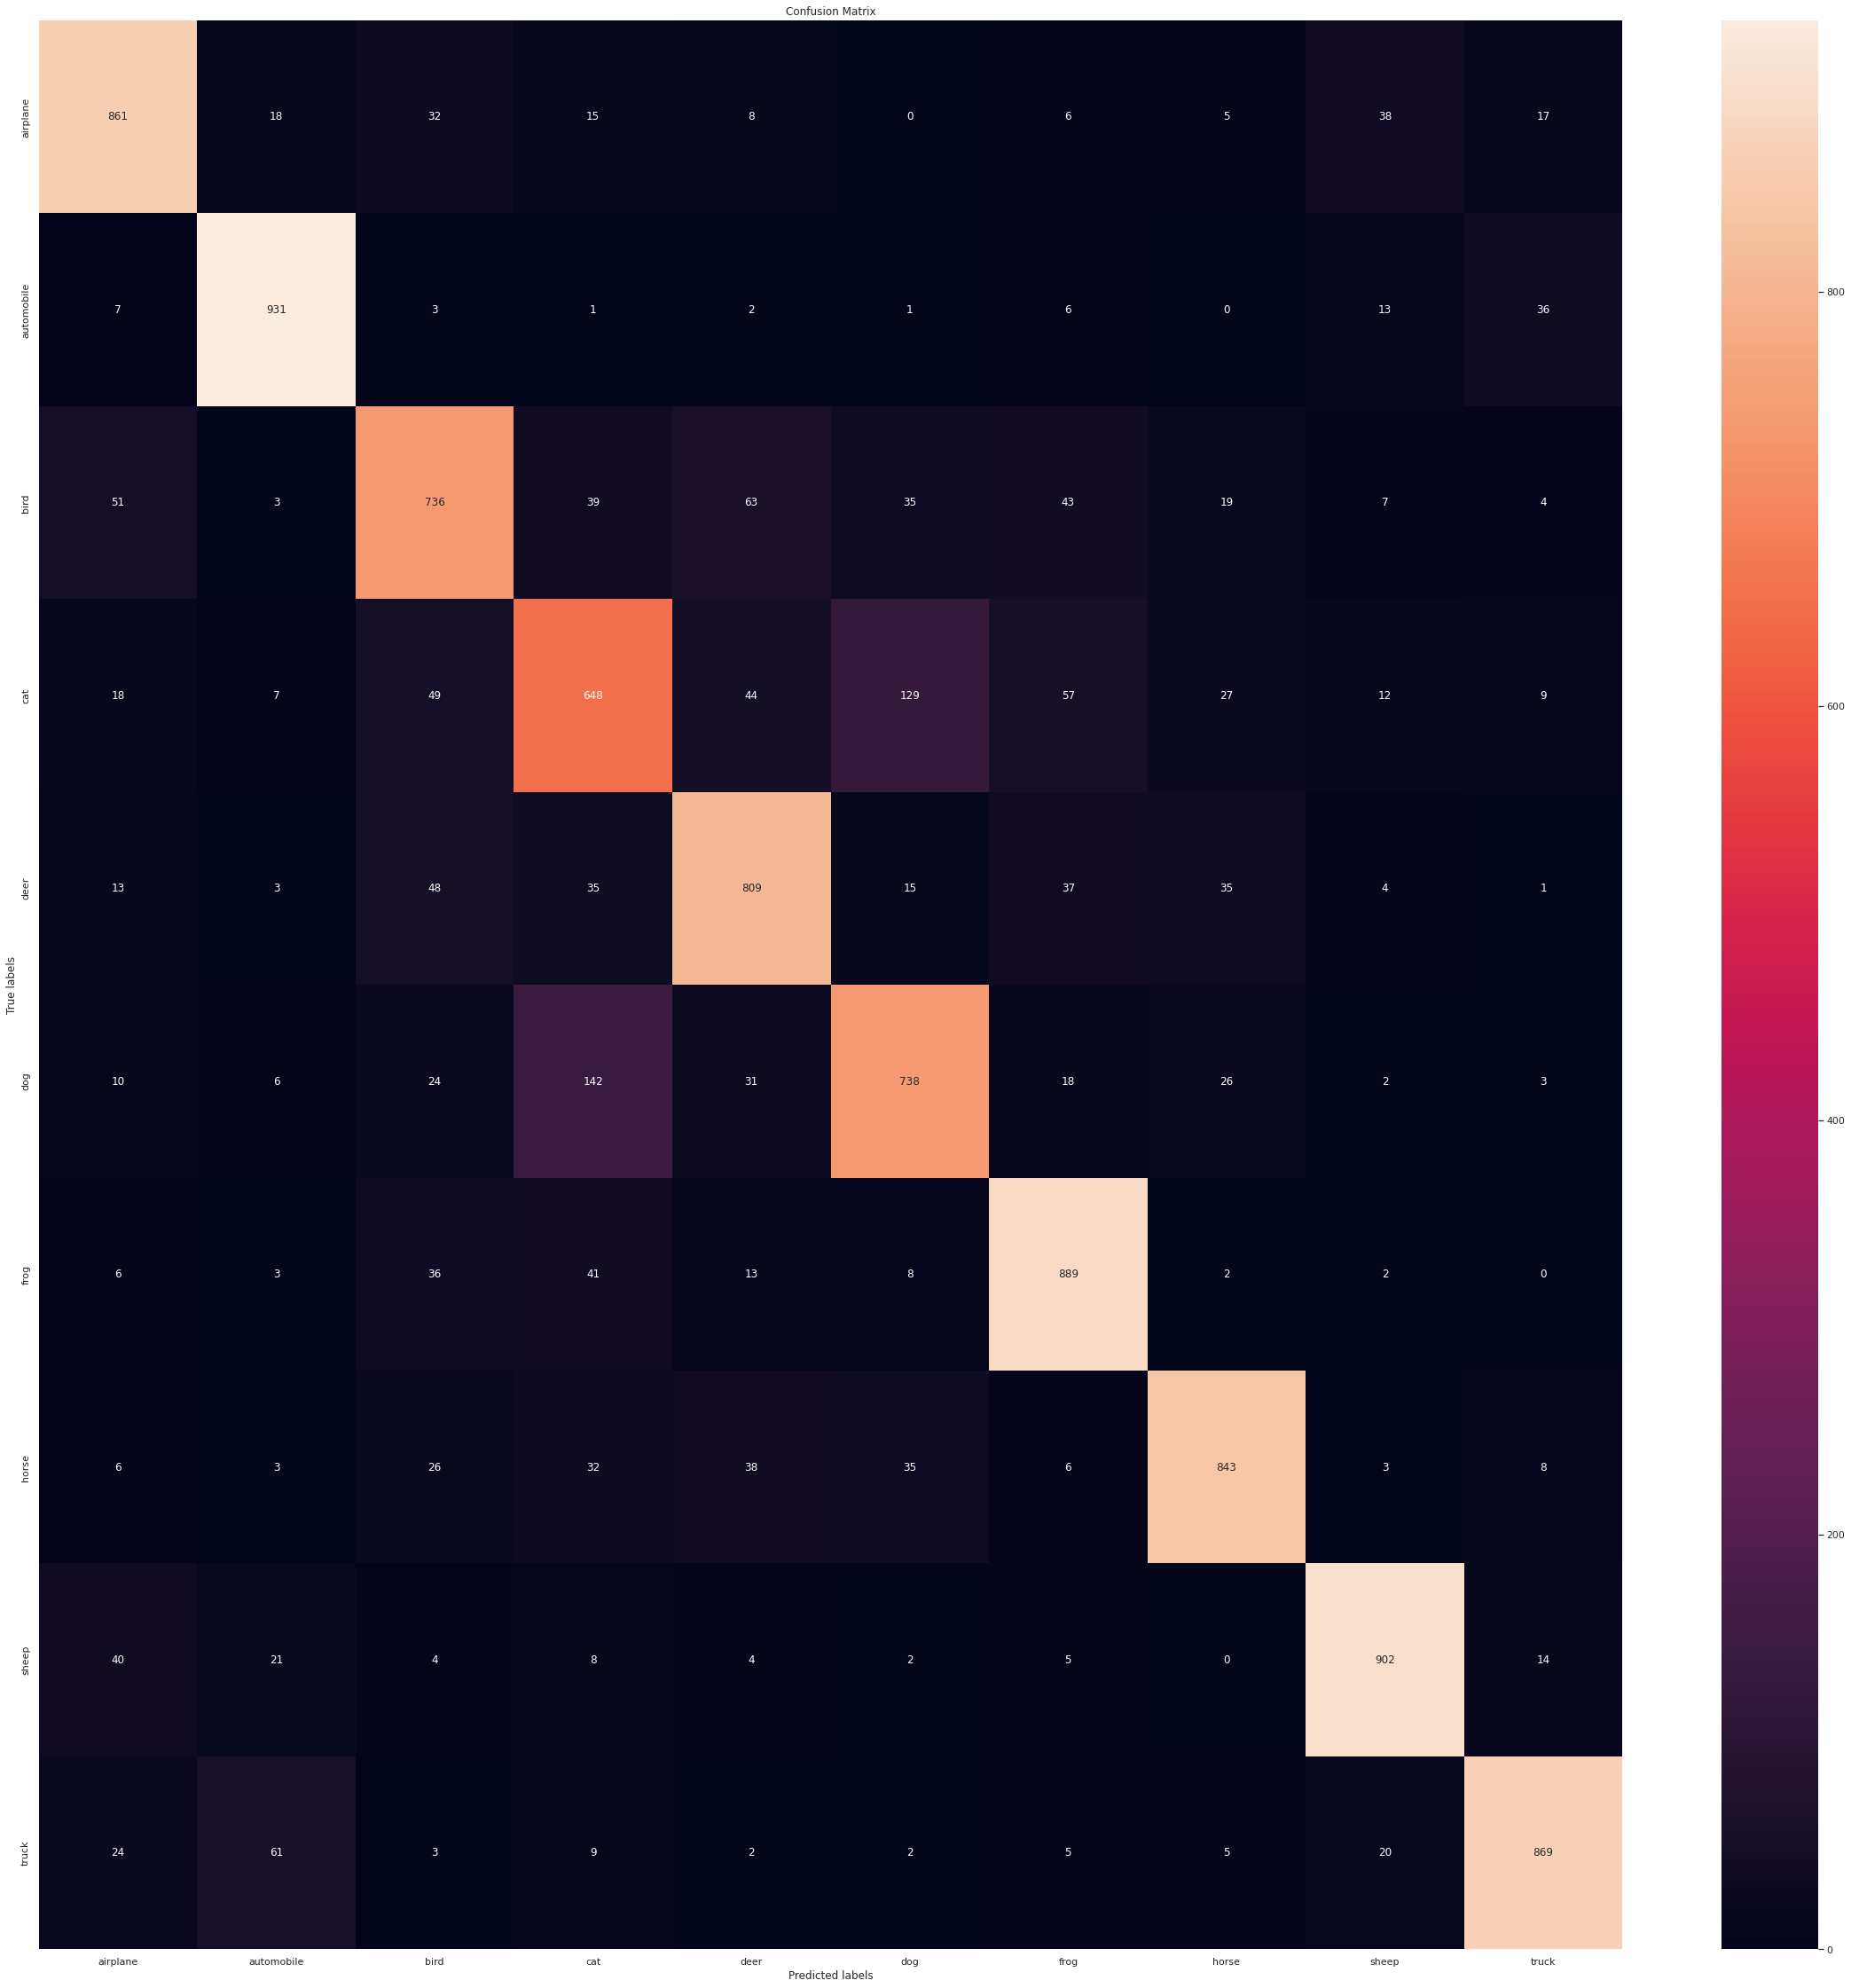

In [57]:
# Matriu de confusió
# calculate confussion matrix
matrix = confusion_matrix(y_test, y_pred)

# plot confussion matrix and the labels
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)
sns.set(rc={'figure.figsize':(40,40)})

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['airplane','automobile','bird','cat','deer','dog','frog','horse','sheep','truck'])
ax.yaxis.set_ticklabels(['airplane','automobile','bird','cat','deer','dog','frog','horse','sheep','truck'])

Veiem que el tipus d'imatge amb millor recall (el percentatge de positius predits sobre el total de positius veritables) és per els automòbils, que assoleixen un 0.92. Com que hi ha 1000 imatges per cada tipus podem veure fàcilment aquelles imatges que es prediuen millor (les que tenen un valor major en la diagonal). Per ordre són:

- automòbil


### 5.3 Predicció d'algunes imatges del conjunt de test

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici [0,5 pts.]:</strong> Visualitzar deu imatges a l'atzar del conjunt de test. Mostra l'etiqueta real i la predicció.
</div>

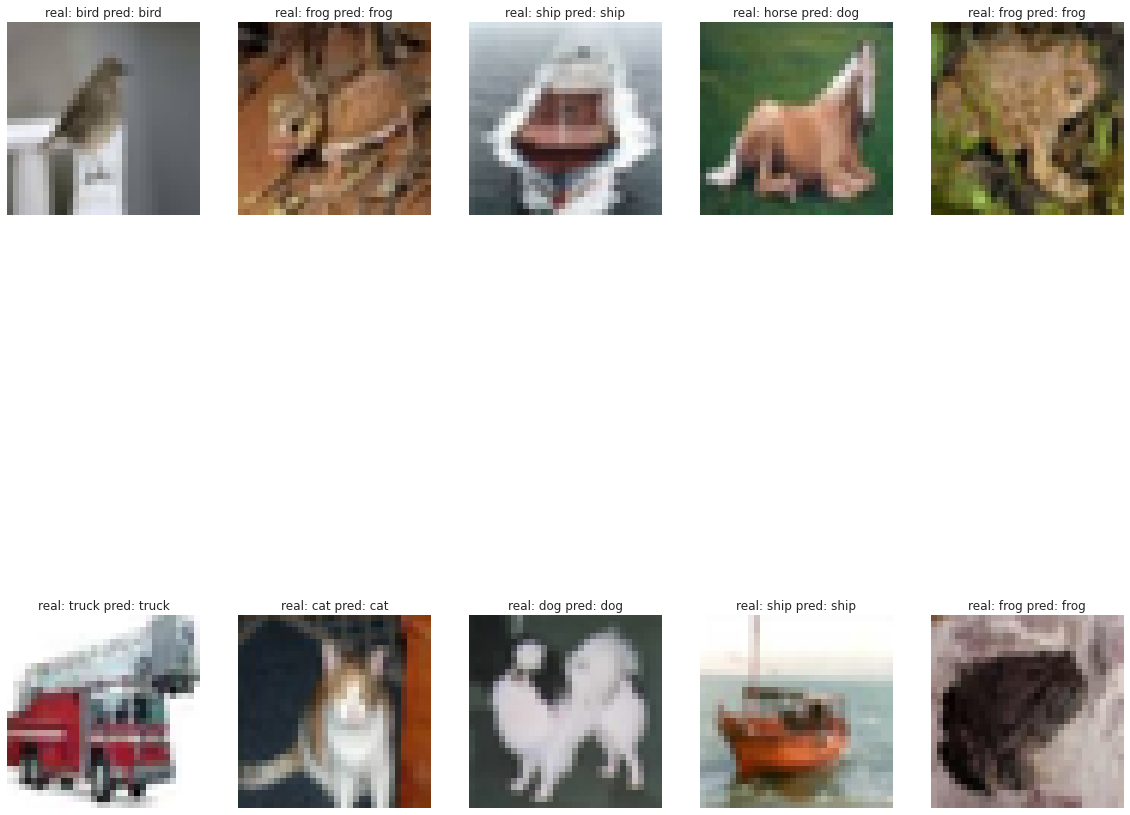

In [55]:
# Visualització
from random import randrange
# les mostrem a mesura que les generem amb random
# definim la graella d'imatges
fig, axes1 = plt.subplots(2,5,figsize=(20,20))
# inicialitzem el comptador random
im = 0
for j in range(2):
    for k in range(5):
        im = randrange(10000)
        axes1[j][k].set_axis_off()
        title = "real: " + text_titles[int(y_test[im])] + " pred: " + text_titles[int(np.argmax(
            DeepCNNRGB.predict((X_test_norm[im:im+1][0]).reshape(1,32,32,3)), axis=-1))]
        axes1[j][k].set_title(title)
        axes1[j][k].imshow(X_test[im:im+1][0])

Veiem que les prediccions són força bones. De fet, veiem que només falla en el cavall, que el veu com un gos. però francament, a mi m'ha costat veure que era un cavall i realment és una foto on pot arribar a assemblar-se a un gos.